# Instalação dos módulos

In [34]:
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install opencv-python
!pip install opencv-contrib-python

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Importação dos módulos

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

from scipy.spatial import distance

%matplotlib inline

C:\Users\vini_\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Leitura e impressão de imagem

In [36]:
# Leitura de imagem a partir de arquivo

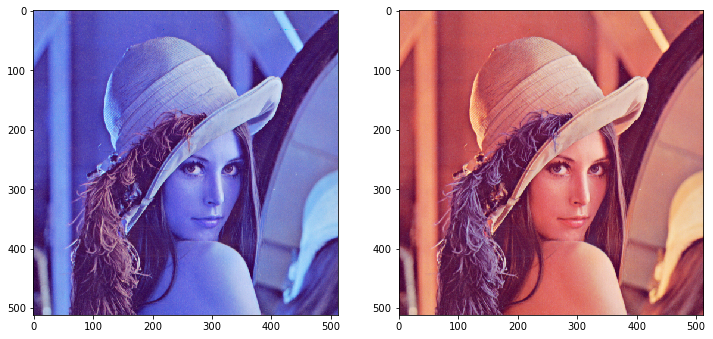

In [37]:
# Plot da imagem na tela

# Conversão de color spaces

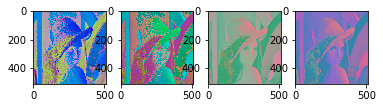

In [38]:
# Conversão para diferentes color spaces


plt.subplot(141)
plt.imshow(img_hsv)
plt.subplot(142)
plt.imshow(img_hls)
plt.subplot(143)
plt.imshow(img_lab)
plt.subplot(144)
plt.imshow(img_yuv)

# Extração de corners

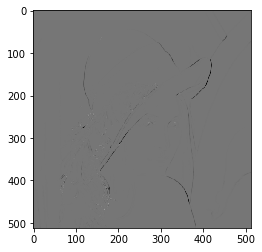

In [39]:
# Extração de corners com o detector Harris

plt.imshow(corners, cmap='gray')

# Extração de features SIFT

In [40]:
# Instanciação do extrator SIFT

In [41]:
# Detecção de keypoints com o extrator SIFT

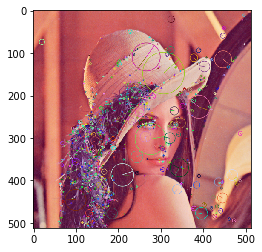

In [42]:
img_kp = np.zeros_like(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp)

In [43]:
# Computação do descritor com o extrator SIFT

des.shape

(1098, 128)

In [44]:
# Extração e computação em um único passo

np.allclose(des, des2)

True

# Extração de features SURF

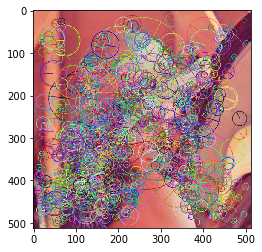

In [45]:
# Extração de keypoints com o extrator SURF

img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp)

In [46]:
# Computação de descritores com extrator SURF

des.shape

(1462, 64)

# Teste de invariância

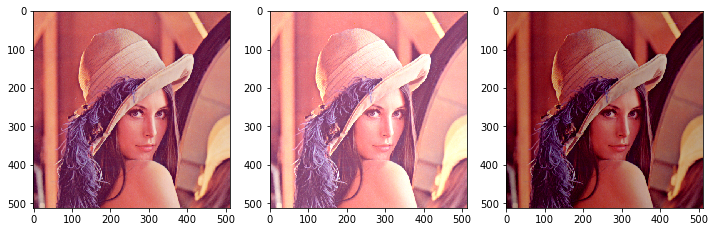

In [47]:
img_bgr_lighter = np.where((255 - img_bgr) < 50, 255, img_bgr + 50)
img_bgr_darker = np.where((255 + img_bgr) < 50, 0, img_bgr - 50)
img_rgb_lighter = cv2.cvtColor(img_bgr_lighter, cv2.COLOR_BGR2RGB)
img_rgb_darker = cv2.cvtColor(img_bgr_darker, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img_rgb)
plt.subplot(132)
plt.imshow(img_rgb_lighter)
plt.subplot(133)
plt.imshow(img_rgb_darker)

In [48]:
kp_orig, des_orig = sift.detectAndCompute(img_bgr, None)
img_kp_orig = np.zeros_like(img_bgr)
img_kp_orig = cv2.drawKeypoints(img_rgb, kp_orig, img_kp_orig,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp_lighter, des_lighter = sift.detectAndCompute(img_bgr_lighter, None)
img_kp_lighter = np.zeros_like(img_bgr_lighter)
img_kp_lighter = cv2.drawKeypoints(img_rgb_lighter, kp_lighter, img_kp_lighter,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp_darker, des_darker = sift.detectAndCompute(img_bgr_darker, None)
img_kp_darker = np.zeros_like(img_bgr_darker)
img_kp_darker = cv2.drawKeypoints(img_rgb_darker, kp_darker, img_kp_darker,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

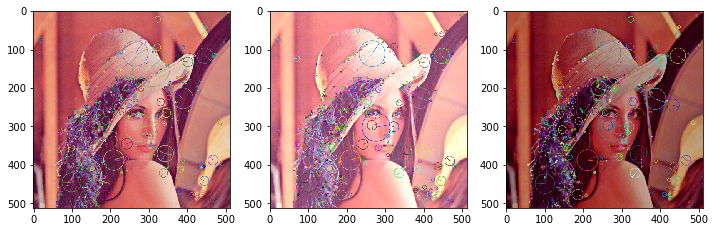

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img_kp_orig)
plt.subplot(132)
plt.imshow(img_kp_lighter)
plt.subplot(133)
plt.imshow(img_kp_darker)

# Leitura do dataset de imagens

In [3]:
images = glob('./datasets/computer_vision/SimpleImageDataset/*.jpg')

# Função de histograma de cores

In [53]:
def chist(im):
    # Implementação da função de histograma de cores

# Extração de features do dataset

In [54]:
# Extração de features de histograma das imagens do dataset

# Pipeline de classificação

In [55]:
clf = Pipeline([('preproc', StandardScaler()),
               ('classifier', LogisticRegression())])

# Treinamento e validação do modelo

In [56]:
cv = cross_validation.LeaveOneOut(len(images))
scores = cross_validation.cross_val_score(clf, features, labels, cv=cv)
print('Accuracy:', scores.mean())

Accuracy: 0.9111111111111111


# Computação da distância entre features

In [64]:
# Cálculo da matriz de distâncias das imagens

# Visualização do vizinho mais próximo

C:\Users\vini_\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


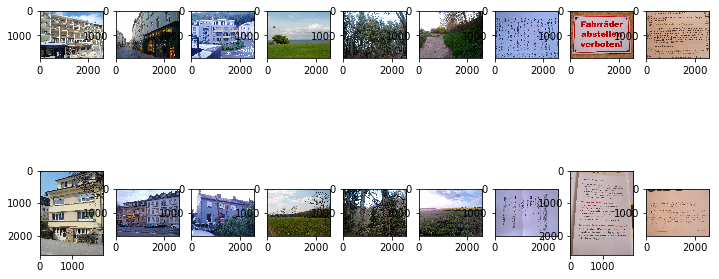

In [58]:
fig, axes = plt.subplots(2, 9, figsize=(12, 6))
for ci, i in enumerate(range(0, 90, 10)):
    left = images[i]
    dists_left = dists[i]
    right = dists_left.argsort()
    right = right[1]
    right = images[right]
    left = cv2.imread(left)
    right = cv2.imread(right)
    axes[0, ci].imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB))
    axes[1, ci].imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
fig.show()

# Extração de features SURF do dataset

In [24]:
alldescriptors = []
for im in images:
    im = cv2.imread(im)
    # Extração de features SURF da imagem
concatenated = np.concatenate(alldescriptors)
print('Number of descriptors:', len(concatenated))

Number of descriptors: 2624344


# K-means clustering das features

In [25]:
# K-Means clustering das features SURF

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=256, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Construção do modelo bag of words

In [26]:
# Modelo bag of words a partir das features SURF

# Treinamento e validação do modelo

In [27]:
scores = cross_validation.cross_val_score(
    clf, sfeatures, labels, cv=cv
)
print('Accuracy:', scores.mean())

Accuracy: 0.9555555555555556
